In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

## Example1

In [3]:
univ=pd.read_csv("C://Users/jeysu_000/Data Science/For Practice/Clustering/Universities_Clustering.csv")
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_univ=scaler.fit_transform(univ.iloc[:,1:])

In [6]:
#How to find optimum number of cluster
#The k means algorithm aims to choose centroids that minimize the 

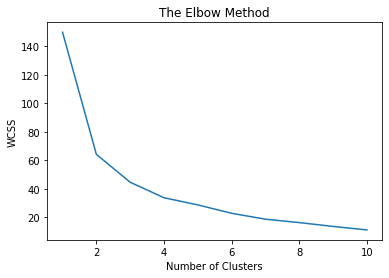

In [8]:
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i,random_state=0)
    clf.fit(scaled_univ)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
#in this case k 4 is fine

In [11]:
from sklearn.cluster import KMeans
clusters_new=KMeans(4,random_state=42)
clusters_new.fit(scaled_univ)


KMeans(n_clusters=4, random_state=42)

In [12]:
clusters_new.labels_

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [16]:
univ['cluster_id']=clusters_new.labels_

In [14]:
univ.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


## Example2

In [77]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([5.78044460e-01, 4.85070391e-01, 3.22970789e-01, 6.34171866e-01,
       2.44818801e-01, 6.26826197e-01, 1.32174652e-01, 3.63590227e-01,
       1.23962981e-01, 7.13521662e-01, 1.24797648e-01, 7.75254798e-01,
       5.07069138e-01, 6.54527089e-01, 7.82037195e-01, 5.48348133e-01,
       4.15169957e-02, 3.24279857e-01, 3.56699429e-01, 2.19437868e-01,
       2.46260283e-01, 3.37611497e-01, 2.92580682e-01, 9.25571665e-02,
       8.99265895e-01, 9.57738691e-01, 9.28988658e-01, 2.86205600e-01,
       2.31483993e-01, 9.52319923e-01, 8.01010794e-01, 6.85214973e-01,
       3.83055356e-01, 3.40746922e-01, 4.73956652e-01, 1.24536572e-01,
       9.70948293e-01, 7.35389153e-01, 8.24025830e-01, 9.72469506e-01,
       2.21842946e-01, 4.61031989e-01, 7.58696612e-02, 7.92242434e-01,
       4.76890239e-01, 8.43826210e-01, 8.40641890e-01, 3.73549813e-01,
       3.39788711e-01, 6.88826079e-01, 2.43328890e-01, 2.40153144e-01,
       3.78898997e-01, 4.79717398e-01, 2.18829988e-01, 5.30932763e-01,
      

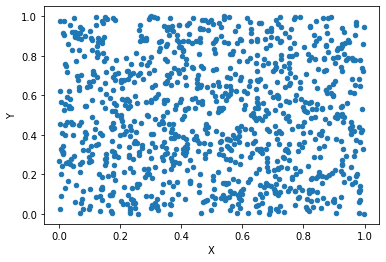

In [13]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



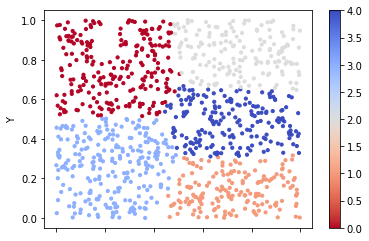

In [19]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm_r)

In [78]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [79]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [80]:
df_norm = norm_func(Univ.iloc[:,1:])

In [81]:
df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


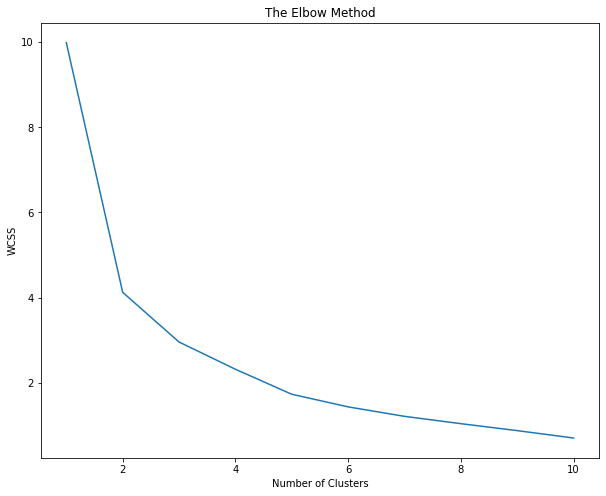

In [82]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [27]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [51]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([4, 2, 3, 4, 4, 0, 0, 4, 0, 2, 0, 4, 4, 1, 0, 1, 0, 1, 3, 4, 3, 4,
       4, 1, 0])

In [37]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,4
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [38]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
4,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667


Text(0.5, 1.0, 'Clusters using KMeans')

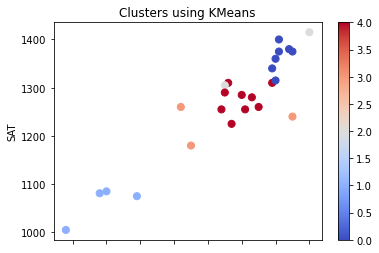

In [73]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [83]:
clf.inertia_

0.6999838360547361

In [84]:
WCSS 


[9.988235196638557,
 4.123452442397179,
 2.955684328573544,
 2.316066848130834,
 1.728568084209018,
 1.4320118047058643,
 1.20962100204299,
 1.0373462130201838,
 0.8741055224761161,
 0.6999838360547361]

We use Akaike information criterion (AIX) AND Bayesian information criterion (BIC) as criteria to select optimal number of clusters. The optimal number of clusters is the number that with minimum AIC/BIC.

In [ ]:

aic = dict()
bic = dict()
for k in range(1,11):
	estimator = GaussianMixture(n_components = k, random_state=seed)
	res = estimator.fit(winenorm)
	ic1 = estimator.aic(winenorm)
	ic2 = estimator.bic(winenorm)
	aic[k] = ic1
	bic[k] = ic2
    
aic_df = pd.Series(aic)
bic_df = pd.Series(bic)

temp = {'AIC' : aic_df,
     'BIC' : bic_df}
ic_df = pd.DataFrame(temp)
ax = ic_df.plot(title='AIC/BIC of GMM')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('AIC/BIC')
plt.plot(3,aic_df[3],'ro')
plt.plot(3,bic_df[3],'ro')